In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import re,string,unicodedata
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score
from sklearn.model_selection import train_test_split
from string import punctuation
from nltk import pos_tag
from nltk.corpus import wordnet
import re
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import nbformat
import plotly.io as pio

In [3]:
#Loading the dataset
df = pd.read_csv('../data/IMDB-Dataset.csv')

# Data Preprocessing

In [4]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/spicytalha/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
#Customize Stopwords as per data
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
new_stopwords = ["would","shall","could","might", "film", "one"]
stop_words.extend(new_stopwords)
stop_words.remove("not")
stop_words=set(stop_words)
print(stop_words)

{'wouldn', 'hers', 'isn', "haven't", 'don', 'then', 'wasn', 'be', 'does', 'further', 'and', 'y', "shan't", 'o', "you'd", 'so', 'these', 'ain', 'during', 'do', 'you', 'needn', 'herself', 'there', "you're", 'shall', "it's", 'which', 'her', 'just', 'm', 'that', 'a', 'too', 'can', 'very', 'before', 'on', "should've", 'an', 'theirs', 'off', 'both', "needn't", "aren't", 'are', 'itself', 'am', 'hadn', 'their', 'while', 'of', 'once', 's', 've', 'same', "mightn't", 'should', 'is', "shouldn't", 'myself', 'had', "you'll", 'did', 'were', 'each', 'might', 'when', "won't", 'me', "she's", 'your', 'them', 'who', 'll', 'ma', 'weren', 't', 'having', "weren't", 'few', 'more', "couldn't", 'won', 'about', "wasn't", 'ours', 'have', 'between', 'or', 'for', 'where', 'could', 'film', 'again', 'at', 'he', 'down', 'mustn', 'shouldn', 'whom', 'now', "hadn't", "that'll", 'above', "hasn't", 'will', 'd', 'by', 'themselves', 'against', 'yourself', "doesn't", 'any', 'up', 'my', 'ourselves', 'doing', 'they', 'yours', '

In [6]:
#Removing special character
def remove_special_character(content):
    return re.sub('\W+',' ', content )#re.sub('\[[^&@#!]]*\]', '', content)

# Removing URL's
def remove_url(content):
    return re.sub(r'http\S+', '', content)

#Removing the stopwords from text
def remove_stopwords(content):
    clean_data = []
    for i in content.split():
        if i.strip().lower() not in stop_words and i.strip().lower().isalpha():
            clean_data.append(i.strip().lower())
    return " ".join(clean_data)

def contraction_expansion(content):
    content = re.sub(r"won\'t", "would not", content)
    content = re.sub(r"can\'t", "can not", content)
    content = re.sub(r"don\'t", "do not", content)
    content = re.sub(r"shouldn\'t", "should not", content)
    content = re.sub(r"needn\'t", "need not", content)
    content = re.sub(r"hasn\'t", "has not", content)
    content = re.sub(r"haven\'t", "have not", content)
    content = re.sub(r"weren\'t", "were not", content)
    content = re.sub(r"mightn\'t", "might not", content)
    content = re.sub(r"didn\'t", "did not", content)
    content = re.sub(r"n\'t", " not", content)
    return content

In [7]:
#Data preprocessing
def data_cleaning(content):
    content = contraction_expansion(content)
    content = remove_special_character(content)
    content = remove_url(content)
    
    content = remove_stopwords(content)    
    return content

In [8]:
pd.options.display.max_colwidth = 1000
#Data cleaning
df['Reviews_clean']=df['Reviews'].apply(data_cleaning)
df.head(5)

,Ratings,Reviews,Movies,Resenhas,Reviews_clean
0,1.0,"*Disclaimer: I only watched this movie as a conditional agreement. And I see films for free. I wouldn't be caught dead giving my hard earned money to these idiots.Well, to explain the depth of this 'film', I could write my shortest review, ever. Don't see this movie. It is by far the stupidest, lamest, most lazy, and unbelievably UNFUNNY movie I have ever seen. It is a total disaster. But since my hatred for this movie, and the others like it, extends far beyond one viewing, I think I'll go on for a bit.I don't know any of the people in the movie besides Carmen Electra, Vanessa Minnillo, and Kim Kardashian, but it doesn't matter. They're all horrible, though I think that was the point. The editing is flat out horrible, and possibly blatant continuity errors make this crapfast even crappier than I thought it would be. Now I know that these films are not supposed to be serious at all, but come on, it's film-making 101 that if someone gets a minor facial cut, it should be there in the...",Disaster Movie,"* Isenção de responsabilidade: eu só assisti esse filme como um acordo condicional. E eu vejo filmes de graça. Eu não seria pego morto dando meu dinheiro suado a esses idiotas. Bem, para explicar a profundidade desse 'filme', eu poderia escrever minha crítica mais curta de todos os tempos. Não vê este filme. É de longe o filme mais estúpido, lamenta, preguiçoso e inacreditavelmente UNFUNNY que eu já vi. É um desastre total. Mas como o meu ódio por este filme e por outros, se estende muito além de uma exibição, acho que vou continuar um pouco. Não conheço nenhuma das pessoas do filme além de Carmen Electra, Vanessa Minnillo, e Kim Kardashian, mas isso não importa. Eles são todos horríveis, embora eu ache que esse seja o ponto. A edição é horrível e, possivelmente, erros de continuidade flagrantes tornam essa porcaria ainda mais horrível do que eu pensava. Agora eu sei que esses filmes não devem ser sérios, mas vamos lá, é o cinema 101 que se alguém fizer um pequeno corte facial, ele...",disclaimer watched movie conditional agreement see films free not caught dead giving hard earned money idiots well explain depth write shortest review ever not see movie far stupidest lamest lazy unbelievably unfunny movie ever seen total disaster since hatred movie others like extends far beyond viewing think go bit not know people movie besides carmen electra vanessa minnillo kim kardashian not matter horrible though think point editing flat horrible possibly blatant continuity errors make crapfast even crappier thought know films not supposed serious come making someone gets minor facial cut next shot someone gets cut sword blood least cut though since narnia films get away give disaster movie pass jokes thoughtless mindless physical gags obviously take popular movies last year late well including best picture nominees know saddest thing stupid movies not care much money make many cameos sorry ass excuses films taking away jobs actors writers directors truly deserve attention li...
1,1.0,"I am writing this in hopes that this gets put over the previous review of this ""film"". How anyone can find this slop entertaining is completely beyond me. First of all a spoof film entitled ""Disaster Movie"", should indeed be a spoof on disaster films. Now I have seen 1 (yes count them, 1) disaster film being spoofed, that being ""Twister"". How does Juno, Iron Man, Batman, The Hulk, Alvin and the Chipmunks, Amy Winehouse, or Hancock register as Disaster films? Selzterwater and Failburg once again have shown that they lack any sort of writing skill and humor. Having unfortunately been tortured with Date Movie and Epic Movie I know exactly what to expect from these two...no plot, no jokes just bad references and cheaply remade scenes from other films. Someone should have informed them that satire is more than just copy and paste from one film to another, though I shouldn't say that because some of these ac

# Data Analysis

In [9]:
#Checking for missing value
df.isna().sum()

Ratings           0
Reviews           0
Movies           25
Resenhas          0
Reviews_clean     0
dtype: int64

In [10]:
df['Ratings'].describe()

count    150000.000000
mean          5.500000
std           2.872291
min           1.000000
25%           3.000000
50%           5.500000
75%           8.000000
max          10.000000
Name: Ratings, dtype: float64

In [11]:
df['Reviews_clean'].describe()

count                                                                   150000
unique                                                                  149753
top       story soundtrack dialog graphic reasonableness entertainment overall
freq                                                                        10
Name: Reviews_clean, dtype: object

In [12]:
print('Unique reviews:%s' % df.Reviews_clean.nunique())
print('Unique movie names:%s' % df.Movies.nunique())
print('No of ratings:%s'% df.Ratings.count())

Unique reviews:149753
Unique movie names:14206
No of ratings:150000


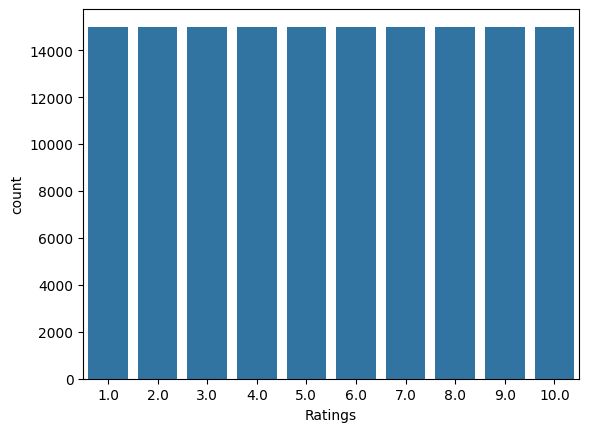

Ratings
1.0     15000
2.0     15000
4.0     15000
3.0     15000
5.0     15000
6.0     15000
8.0     15000
7.0     15000
10.0    15000
9.0     15000
Name: count, dtype: int64


In [13]:
#Checking for Class Imbalance 
sns.countplot(x=df['Ratings'])
plt.show()
print(df['Ratings'].value_counts())

(np.float64(-0.5), np.float64(1499.5), np.float64(799.5), np.float64(-0.5))

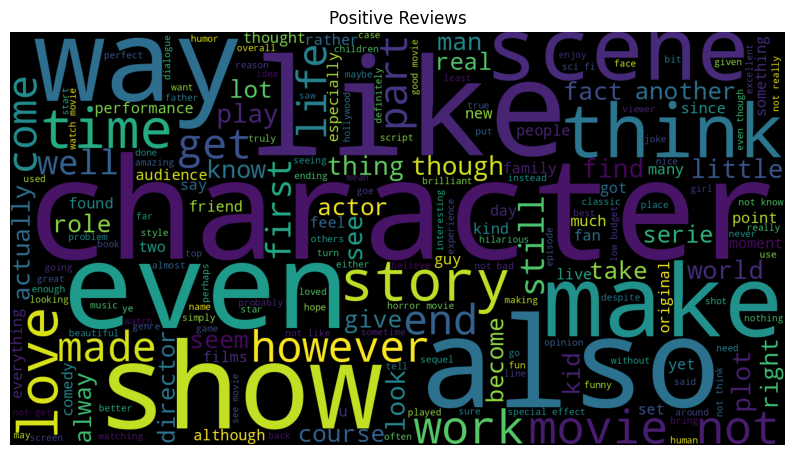

In [14]:
#Visualization of Important Words from Positive Reviews
sentences=df['Reviews_clean']
pos=' '.join(map(str,sentences[df['Ratings']>=7])) #Positive Reviews
neg=' '.join(map(str,sentences[df['Ratings']<=4])) #Negative Reviews
  
pos_wordcloud = WordCloud(width = 1500, height = 800, 
                background_color ='black', 
                stopwords = stop_words, 
                min_font_size = 15).generate(pos) #Positive Reviews WordCloud for Visualization

plt.figure(figsize=(10,10))
plt.imshow(pos_wordcloud)
plt.title('Positive Reviews')
plt.axis('off')

(np.float64(-0.5), np.float64(1499.5), np.float64(799.5), np.float64(-0.5))

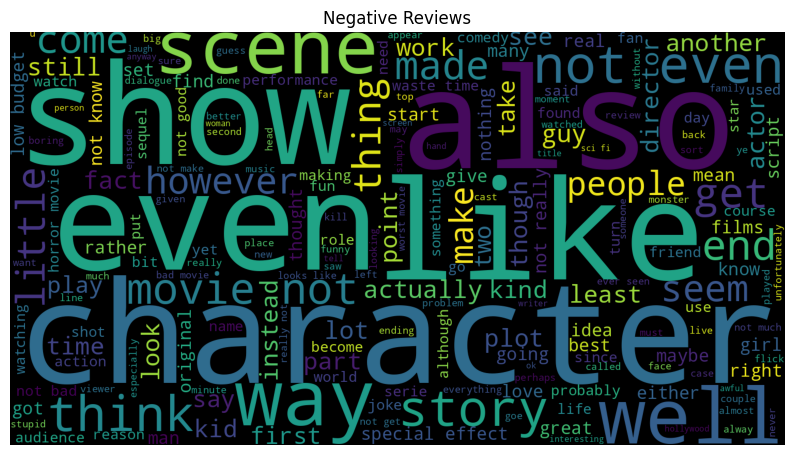

In [15]:
#Visualization of Important Words from Negative Reviews
  
neg_wordcloud = WordCloud(width = 1500, height = 800, 
                background_color ='black', 
                stopwords = stop_words, 
                min_font_size = 15).generate(neg) #Positive Reviews WordCloud for Visualization

plt.figure(figsize=(10,10))
plt.imshow(neg_wordcloud)
plt.title('Negative Reviews')
plt.axis('off')

# Basic Stats of Words for both Reviews

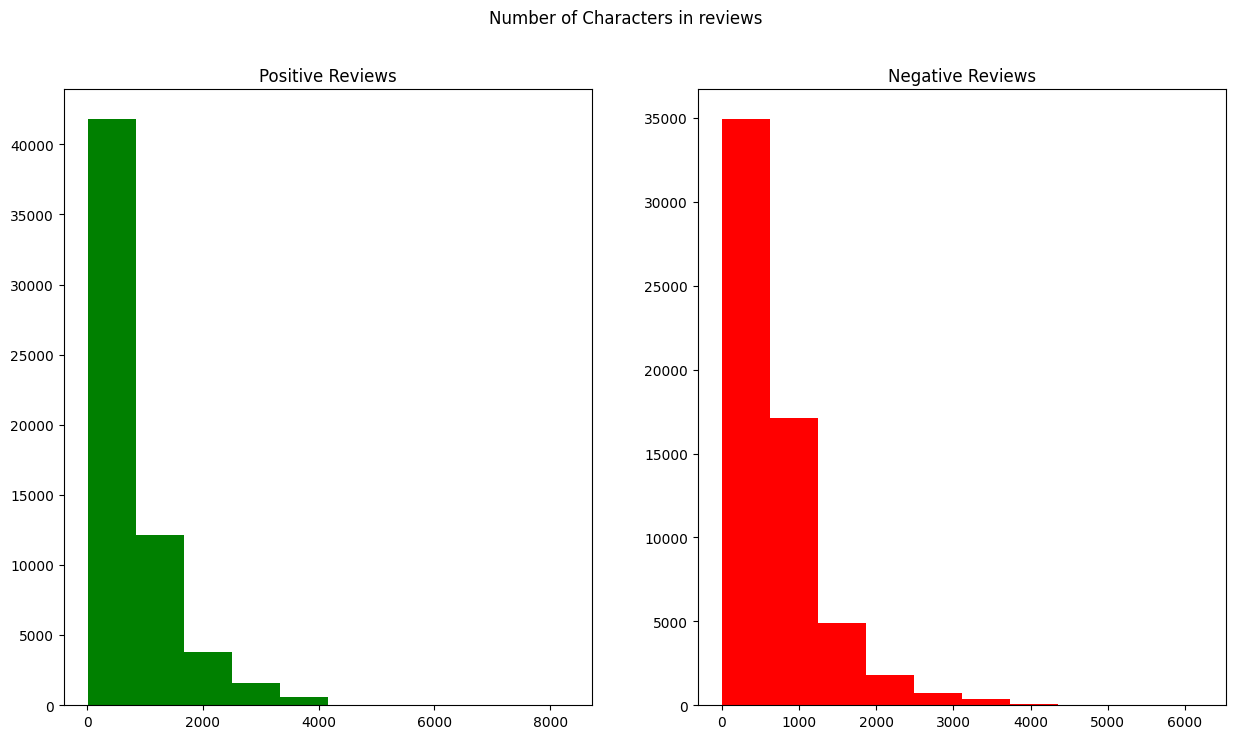

In [16]:
#Visulaization of number of character per reviews
figure,(pos_ax,neg_ax)=plt.subplots(1,2,figsize=(15,8))
len_pos_review=df[df['Ratings']>=7]['Reviews_clean'].str.len() #Positive Reviews
pos_ax.hist(len_pos_review,color='green')
pos_ax.set_title('Positive Reviews')
len_neg_review=df[df['Ratings']<=4]['Reviews_clean'].str.len() #Negative Reviews
neg_ax.hist(len_neg_review,color='red')
neg_ax.set_title('Negative Reviews')
figure.suptitle('Number of Characters in reviews') #Total Reviews
plt.show()

Text(0.5, 0.98, 'Average word length in Reviews')

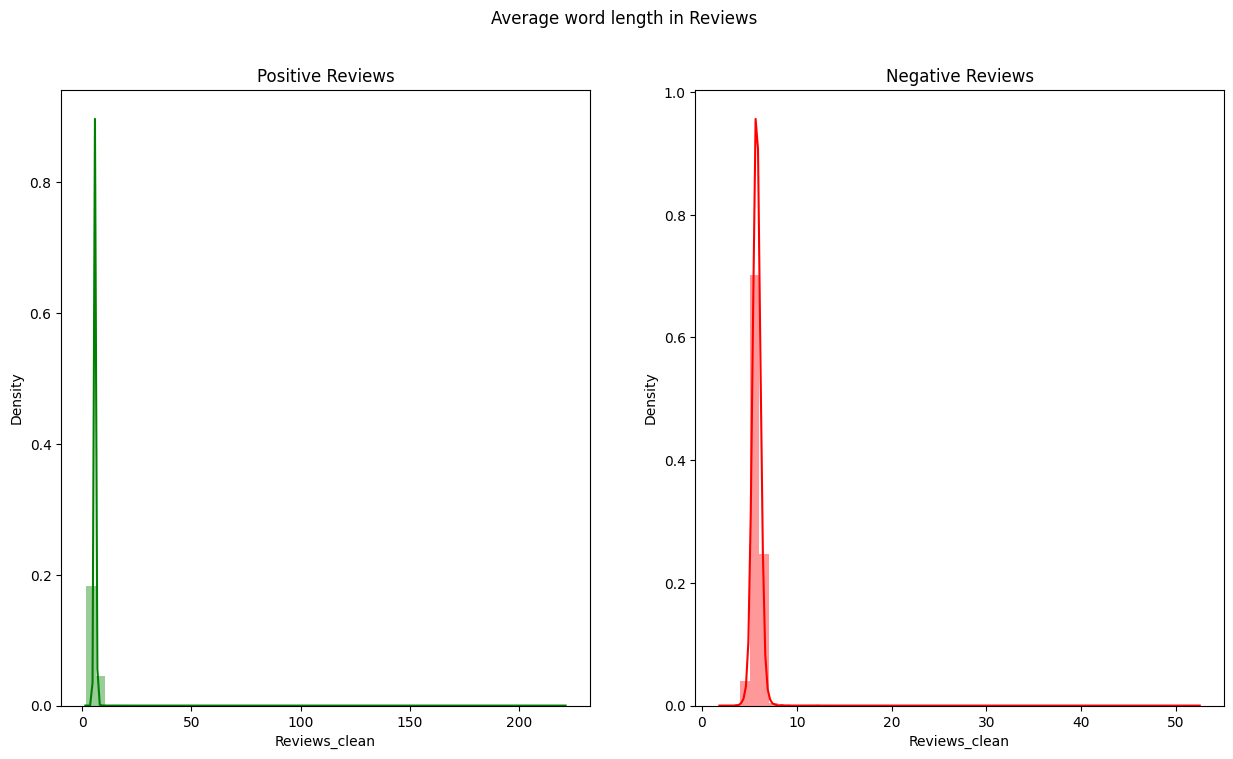

In [17]:
#Visulaize average of words in reviews
figure,(pos_ax,neg_ax)=plt.subplots(1,2,figsize=(15,8))
pos_word=df[df['Ratings']>=7]['Reviews_clean'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(pos_word.map(lambda x: np.mean(x)),ax=pos_ax,color='green')
pos_ax.set_title('Positive Reviews')
neg_word=df[df['Ratings']<=4]['Reviews_clean'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(neg_word.map(lambda x: np.mean(x)),ax=neg_ax,color='red')
neg_ax.set_title('Negative Reviews')
figure.suptitle('Average word length in Reviews')

In [18]:
#Get important feature by using Countvectorizer
def get_top_text_ngrams(corpus, n, g):
    vec = CountVectorizer(ngram_range=(g, g)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

  Common_words   Count
0          not  155501
1        movie  127808
2         like   50340
3         good   46541
4        great   34863


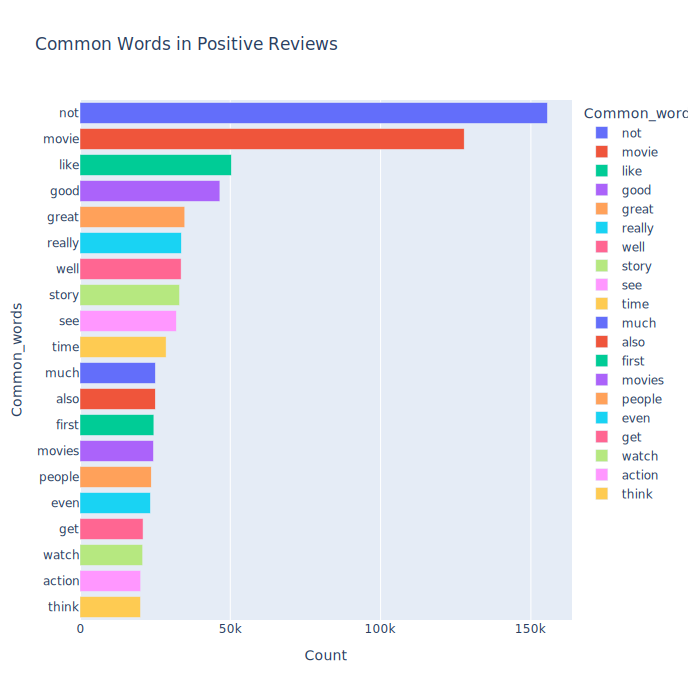

In [19]:
most_common_uni = get_top_text_ngrams(df.Reviews_clean[df['Ratings'] >= 7], 20, 1)
if most_common_uni:
    most_common_uni = dict(most_common_uni)
    temp = pd.DataFrame(columns=["Common_words", "Count"])
    temp["Common_words"] = list(most_common_uni.keys())
    temp["Count"] = list(most_common_uni.values())

    print(temp.head())  # Debugging step
    fig = px.bar(
        temp,
        x="Count",
        y="Common_words",
        title="Common Words in Positive Reviews",
        orientation="h",
        width=700,
        height=700,
        color="Common_words",
    )
    pio.renderers.default = "svg"  # You can change this to "browser" if needed
    fig.show()
else:
    print("No data returned from get_top_text_ngrams.")


      Common_words  Count
0        movie not   7272
1  special effects   3733
2         not know   3666
3         not like   3499
4       not really   3176


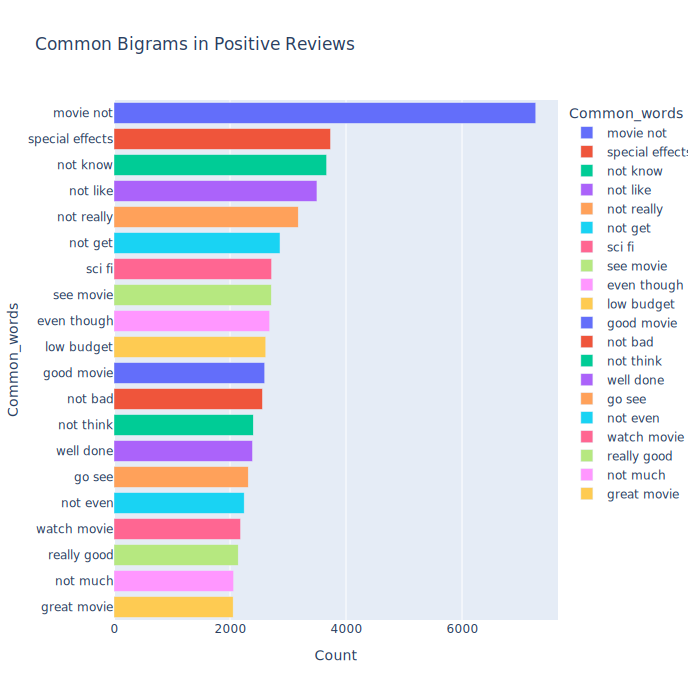

In [20]:
most_common_uni = get_top_text_ngrams(df.Reviews_clean[df['Ratings'] >= 7], 20, 2)

if most_common_uni:
    most_common_uni = dict(most_common_uni)
    temp = pd.DataFrame(columns=["Common_words", "Count"])
    temp["Common_words"] = list(most_common_uni.keys())
    temp["Count"] = list(most_common_uni.values())
    
    print(temp.head())
    fig = px.bar(
        temp,
        x="Count",
        y="Common_words",
        title="Common Bigrams in Positive Reviews",
        orientation="h",
        width=700,
        height=700,
        color="Common_words",
    )
    pio.renderers.default = "svg"
    fig.show()
else:
    print("No bigrams returned from get_top_text_ngrams.")


         Common_words  Count
0        go see movie    491
1  not take seriously    389
2      not like movie    386
3       not get wrong    374
4        not wait see    349


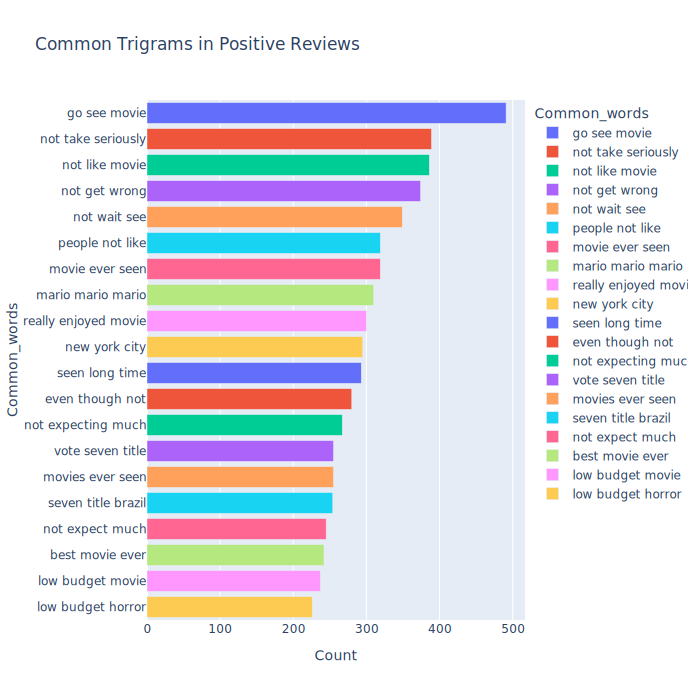

In [21]:
most_common_uni = get_top_text_ngrams(df.Reviews_clean[df['Ratings'] >= 7], 20, 3)

if most_common_uni:
    most_common_uni = dict(most_common_uni)
    temp = pd.DataFrame(columns=["Common_words", "Count"])
    temp["Common_words"] = list(most_common_uni.keys())
    temp["Count"] = list(most_common_uni.values())
    
    print(temp.head())
    fig = px.bar(
        temp,
        x="Count",
        y="Common_words",
        title="Common Trigrams in Positive Reviews",
        orientation="h",
        width=700,
        height=700,
        color="Common_words",
    )
    pio.renderers.default = "svg"
    fig.show()
else:
    print("No Trigrams returned from get_top_text_ngrams.")


              Common_words  Count
0  mario mario mario mario    308
1  vote seven title brazil    254
2              la la la la    199
3  vote eight title brazil    147
4    jean claude van damme    131


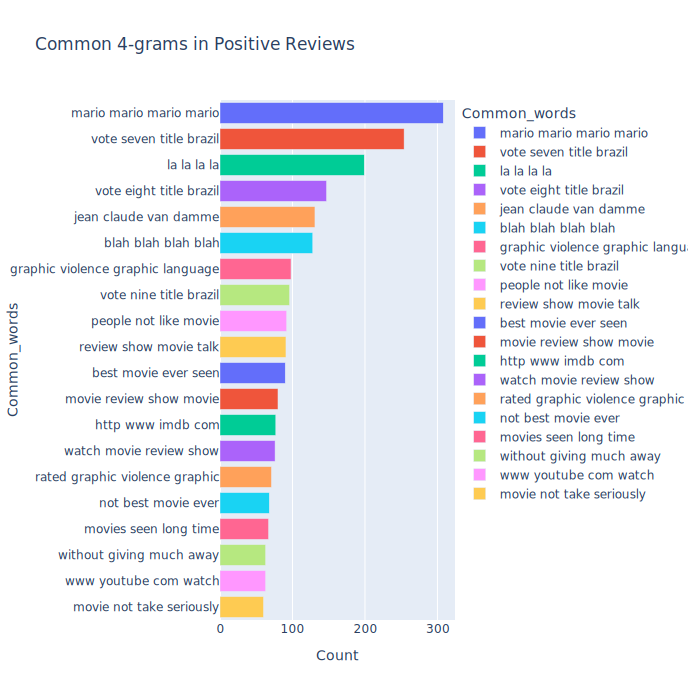

In [23]:
most_common_uni = get_top_text_ngrams(df.Reviews_clean[df['Ratings'] >= 7], 20, 4)

if most_common_uni:
    most_common_uni = dict(most_common_uni)
    temp = pd.DataFrame(columns=["Common_words", "Count"])
    temp["Common_words"] = list(most_common_uni.keys())
    temp["Count"] = list(most_common_uni.values())
    
    print(temp.head())
    fig = px.bar(
        temp,
        x="Count",
        y="Common_words",
        title="Common 4-grams in Positive Reviews",
        orientation="h",
        width=700,
        height=700,
        color="Common_words",
    )
    pio.renderers.default = "svg"
    fig.show()
else:
    print("No 4-grams returned from get_top_text_ngrams.")


In [24]:
pd.options.display.max_colwidth = 1000
df[["Reviews","Ratings","Movies"]][(df['Ratings']>=7)&(df['Reviews'].str.contains("not like| not want| not big fan"))].head(10)

,Reviews,Ratings,Movies
90193,"Starring: Carmen Electra and Brooke Hogan.Scary fish story that really has a lot going for it – Scares,Girls in bikinis and a creature that is NEW ! So let's go out to sea and study,No not like ""The Suite Life On Deck"",But more like Fred Olen Ray 'Showtime' movies in the water.There are villains without fins and people with Brains & Boobs.The creature effects are really good looking as CGI and just fun when do in real time and on set with actors interacting with the teeth plus.This ATOLL set would make a great tourist attraction with a re-tooled 'BRUCE the shark' that was replaced at Universal Studios,Florida.",7.0,2-Headed Shark Attack
90198,"Some folks really downgraded this movie and the two main stars, Casper Van Dien and Elelnia Eliniak by stating their careers were over because of this movie. Come on folks these two are professional actors and know how to act. This movie was not as horrible as some would have us believe nor did their careers end. Just because one did not like the movie is no reason to slam dunk the actors. The movie was actually quite good because of the two main stars It's quite conceivable for a character named Van Helsing not to know at one time in earths ancient culture he had a relative who was a vampire killer. As far as the script it was okay, the cinematography was good as far as one can be from being inside a spacecraft. The vampires exhibited great strength and stealth. They were tall dark and handsome or beautiful and tempting. In the end all the vampires were slain at the expense of most of the crew. To see which vampire remains and which crew members remain and how the movie ends which...",7.0,Dracula 3000
90222,"Alone in the Dark 2 is a fun little Supernatural Thriller with a good little cast & i enjoyed it, it looks like a movie & was actually filmed on film which was very rare back then, & even more rare now it's almost extinct, it's all digital now only ""Tarantino"" still uses film that I've heard of!!!\nAlso the film looks very good with good use of colour & a very slick look with lots of blue & green, a very cool opening actually with a view of new york city & central park, then we go down to central park where we meet 3 witch hunters running from the old Hag, it's very cool.\nThe first film was just ok, not great but not as terrible as all those way over the top reviews destroying it was saying, as there's alot of much worse films out there!!!\nThe music is really good, it's eerie & full of suspense & this little B-movie actually has a strong creepy atmosphere & feels like one of those rare Horror gems you find on t.v in the middle of the night, good solid film.""Alone in the Dark 2"" r...",7.0,Alone in the Dark II
90251,"You have to understand with these kinds of movies (boa vs. python,frankenfish, sasquatch hunters, rottweiler, tower of blood), you are not going to like it. You are going to think it was soo bad it was hilarious. Most importantly you cannot take it seriously as a movie. You have to also watch it with friends so you can all yell and say how stupid something was, or call something that is about to happen. I have seen about 8 movies like this one and I did not like one, but I had an amusing time watching it. WARNING: If you are looking for a scary movie or an interesting suspenseful movie DO NOT WATCH THIS! If you are on the other hand seeing something with friends, and you cant find a good comedy watch one of these. If you pick this movie out because you thought it would be cool, you should have been eliminated from the gene pool years ago. My personal favorite out of these 5 is sasquatch hunters, it was beyond helpless.",7.0,Boa vs. Python
90287,"OK, let's look past the fact that the director, Christina Peters (aka Kat Slater), went on to direct a profusion of pulsating porn including, but not limited to, ""Young Sluts, Inc."" 1 thru 15 and ""Cum Swappers"" 1 thru 4.Let's look past the fact that basically every review is slamming this

  Common_words   Count
0          not  167692
1        movie  122009
2         like   52704
3          bad   37784
4         good   35908


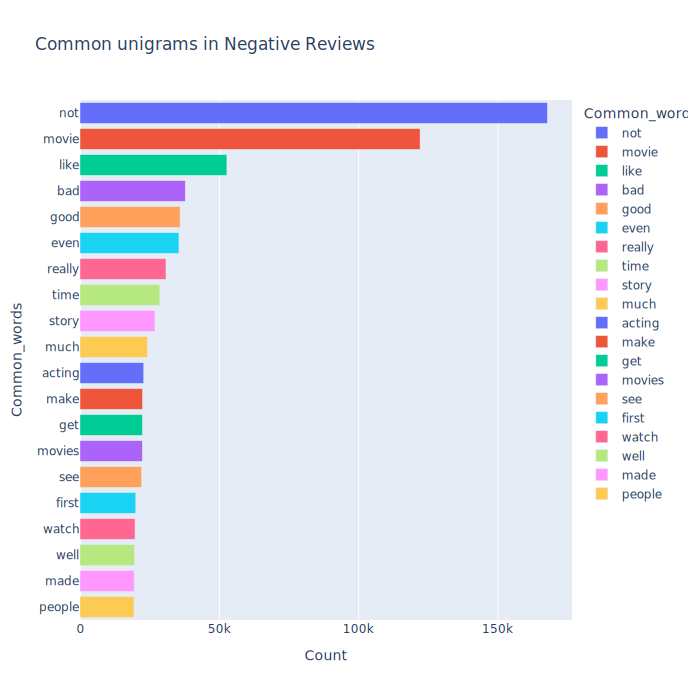

In [25]:
most_common_uni = get_top_text_ngrams(df.Reviews_clean[df['Ratings'] <= 4], 20, 1)

if most_common_uni:
    most_common_uni = dict(most_common_uni)
    temp = pd.DataFrame(columns=["Common_words", "Count"])
    temp["Common_words"] = list(most_common_uni.keys())
    temp["Count"] = list(most_common_uni.values())
    
    print(temp.head())
    fig = px.bar(
        temp,
        x="Count",
        y="Common_words",
        title="Common unigrams in Negative Reviews",
        orientation="h",
        width=700,
        height=700,
        color="Common_words",
    )
    pio.renderers.default = "svg"
    fig.show()
else:
    print("No unigrams returned from get_top_text_ngrams.")


      Common_words  Count
0         not even   8498
1        movie not   7387
2  special effects   4476
3       not really   4076
4         not know   4049


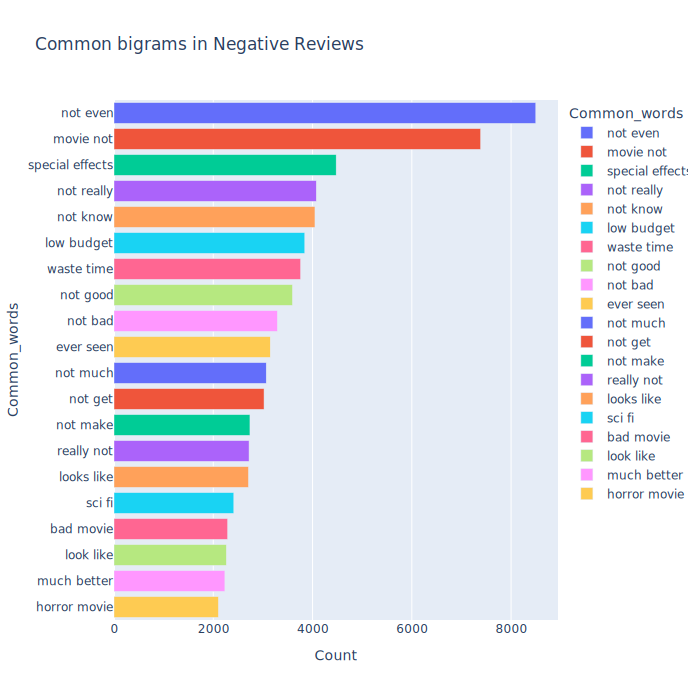

In [26]:
most_common_uni = get_top_text_ngrams(df.Reviews_clean[df['Ratings'] <= 4], 20, 2)

if most_common_uni:
    most_common_uni = dict(most_common_uni)
    temp = pd.DataFrame(columns=["Common_words", "Count"])
    temp["Common_words"] = list(most_common_uni.keys())
    temp["Count"] = list(most_common_uni.values())
    
    print(temp.head())
    fig = px.bar(
        temp,
        x="Count",
        y="Common_words",
        title="Common bigrams in Negative Reviews",
        orientation="h",
        width=700,
        height=700,
        color="Common_words",
    )
    pio.renderers.default = "svg"
    fig.show()
else:
    print("No bigrams returned from get_top_text_ngrams.")


       Common_words  Count
0    not waste time   1366
1  worst movie ever   1063
2   movie ever seen    768
3    not make sense    613
4    movie not even    533


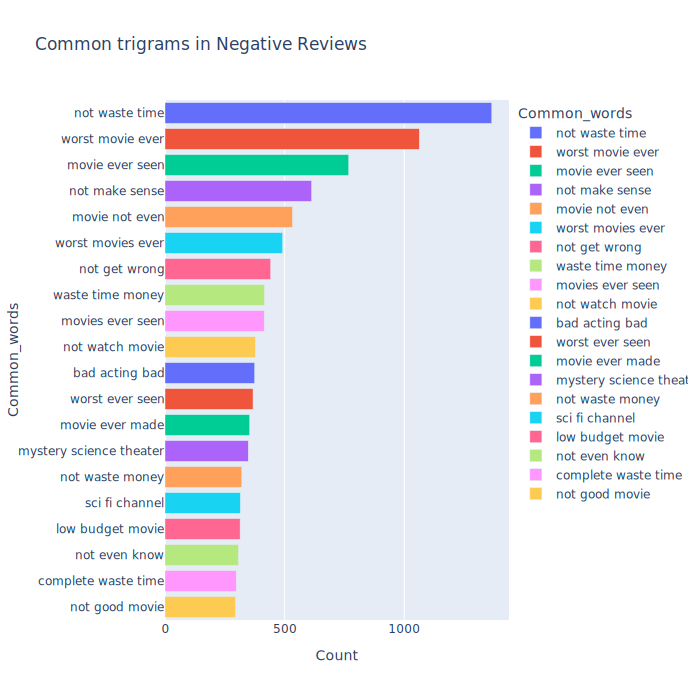

In [27]:
most_common_uni = get_top_text_ngrams(df.Reviews_clean[df['Ratings'] <= 4], 20, 3)

if most_common_uni:
    most_common_uni = dict(most_common_uni)
    temp = pd.DataFrame(columns=["Common_words", "Count"])
    temp["Common_words"] = list(most_common_uni.keys())
    temp["Count"] = list(most_common_uni.values())
    
    print(temp.head())
    fig = px.bar(
        temp,
        x="Count",
        y="Common_words",
        title="Common trigrams in Negative Reviews",
        orientation="h",
        width=700,
        height=700,
        color="Common_words",
    )
    pio.renderers.default = "svg"
    fig.show()
else:
    print("No trigrams returned from get_top_text_ngrams.")

              Common_words  Count
0    worst movie ever seen    535
1   worst movies ever seen    253
2    worst movie ever made    192
3  vote three title brazil    173
4     not waste time money    164


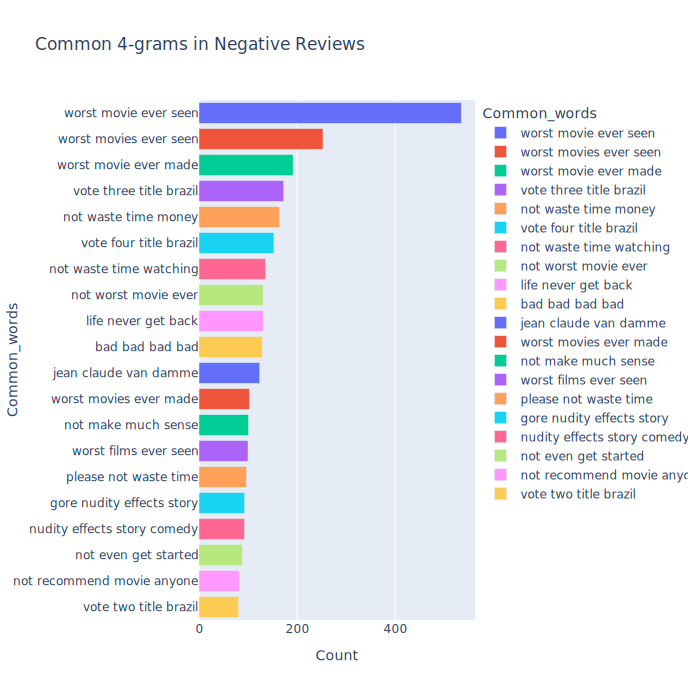

In [28]:
most_common_uni = get_top_text_ngrams(df.Reviews_clean[df['Ratings'] <= 4], 20, 4)

if most_common_uni:
    most_common_uni = dict(most_common_uni)
    temp = pd.DataFrame(columns=["Common_words", "Count"])
    temp["Common_words"] = list(most_common_uni.keys())
    temp["Count"] = list(most_common_uni.values())
    
    print(temp.head())
    fig = px.bar(
        temp,
        x="Count",
        y="Common_words",
        title="Common 4-grams in Negative Reviews",
        orientation="h",
        width=700,
        height=700,
        color="Common_words",
    )
    pio.renderers.default = "svg"
    fig.show()
else:
    print("No 4-grams returned from get_top_text_ngrams.")


                         Common_words  Count
0    gore nudity effects story comedy     92
1                 bad bad bad bad bad     90
2           not worst movie ever seen     69
3   star rating saturday night friday     53
4  rating saturday night friday night     52


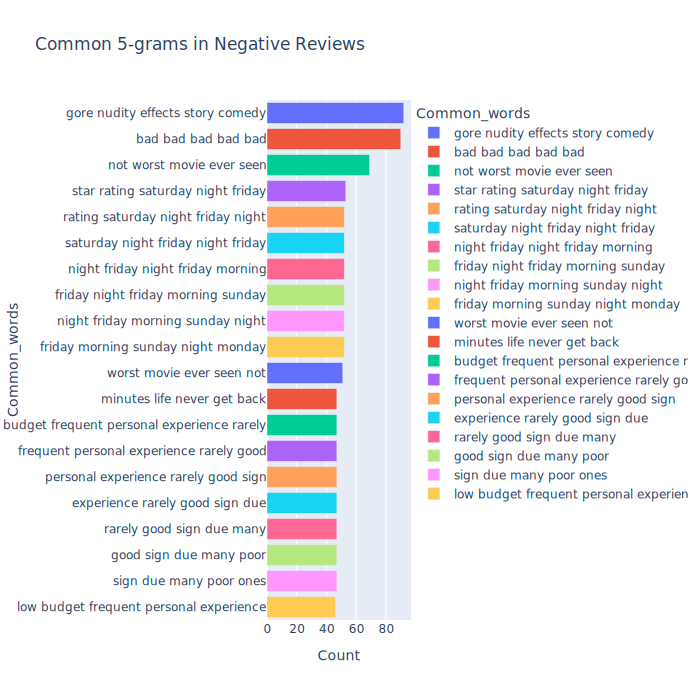

In [29]:
most_common_uni = get_top_text_ngrams(df.Reviews_clean[df['Ratings'] <= 4], 20, 5)

if most_common_uni:
    most_common_uni = dict(most_common_uni)
    temp = pd.DataFrame(columns=["Common_words", "Count"])
    temp["Common_words"] = list(most_common_uni.keys())
    temp["Count"] = list(most_common_uni.values())
    
    print(temp.head())
    fig = px.bar(
        temp,
        x="Count",
        y="Common_words",
        title="Common 5-grams in Negative Reviews",
        orientation="h",
        width=700,
        height=700,
        color="Common_words",
    )
    pio.renderers.default = "svg"
    fig.show()
else:
    print("No 5-grams returned from get_top_text_ngrams.")


In [30]:
pd.options.display.max_colwidth = 1000
df[["Reviews","Ratings","Movies"]][(df['Ratings']<=4)&(df['Reviews_clean'].str.contains("saturday night friday"))].head(100)

,Reviews,Ratings,Movies
7055,"STAR RATING: ***** Saturday Night **** Friday Night *** Friday Morning ** Sunday Night * Monday Morning NO STARS End of Days A made for TV biopic of the pop icon Britney Spears (Natasha Bassett), from starting out with her breakthrough single Baby One More Time in 1999, where she was shoved into the limelight by her pushy mother Lynne (Nicole Oliver) and domineering manager Larry Rudolph (Peter Benson), who both naively thought she was old and mature enough to handle such massive media exposure and pushed her to lie about her virginity to keep up an illusion, through to the trials and turbulence of her relationships with Justin Timberlake (Nathan Keyes) and Kevin Federline (Clayton Chitty), before a revealing 2008 documentary aired.Sometimes, something can give you a really bad vibe, yet you still feel utterly compelled to see it. Your instinct can tell you it looks really bad, and you can see no end of bad reviews, and you can almost write a review before you've even seen it, but ...",1.0,Britney Ever After
17427,"STAR RATING: ***** Saturday Night **** Friday Night *** Friday Morning ** Sunday Night * Monday MorningWill (Joey Pollairi) is the new guy in high school, who stands out as a prime target for bullies. He soon makes friends with Jay (Zach Pearlman), Simon (Bubba Lewis) and Neil (Mark L. Young), three other social misfits who are not complete dorks but far from the coolest kids in school, either.It always spurs you on as a Brit when something home grown becomes a success, as I imagine it probably does for anyone from a small country that's not at the centre of the world (not anymore, anyway.) But it's a sad thing and a sign of the times when the only way to tell what a massive success it's been is when the Americans go and remake it. In fact, this is almost inevitable. And, inevitably, a whole lot worse.The best way I can describe The Inbetweeners USA is: imagine you've just read a really great Stephen King novel, and then see a film adaptation of it that is just like what you've rea...",2.0,The Inbetweeners
17818,"STAR RATING: ***** Saturday Night **** Friday Night *** Friday Morning ** Sunday Night * Monday Morning The premise behind this abysmal action thriller has a group of people going for a good old bit of paint ball, only to find themselves really fighting to stay alive as a barrage of real bullets are fired at them. But the characters are never developed or explored in any way, so it's impossible to care about any of them. Needless to say, there is no air of tension or suspense whatsoever, and the acting is so bad none of them have any life anyway, as though just running around shouting and screaming incoherently at each other gives them any life. Not that there was anything special to see there anyway, just the usual generic stereotypes typical for this genre. And here we have yet another film that hasn't learned the modern trend of shaking the camera around and darkening the lens is an off putting and annoying one rather than an endearing one. One to flee all round. *",2.0,Paintball
18138,"STAR RATING: ***** Saturday Night **** Friday Night *** Friday Morning ** Sunday Night * Monday Morning I could go to great pains to write a long, in depth review of The Last Seven, but it's hard to write much more about it other than my summary above. Right from the opening sequence, with one of the lead characters wondering around a deserted London shouting out for 'anybody!', just like in the aforementioned film, it just feels like such a pale imitation of it that it hurts. In fact, it's almost as if the director knew he was practically copying it scene for scene and just gave up bothering to tell any sort of decent story of his own. As such, it just goes through the motions of the post apocalyptic thriller genre, with the usual stereo-typical set up and characters, without firmly establishing the back story behind the majority of humanity being wiped out and making no sense. Most baffling